In [1]:
%matplotlib inline

In [41]:
import pandas
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


In [3]:
import quantum_simulation_e91 as e91

(array([  4.,   4.,  11.,  20.,  12.,  18.,   7.,  14.,   6.,   4.]),
 array([-2.96733509, -2.93814914, -2.9089632 , -2.87977726, -2.85059131,
        -2.82140537, -2.79221942, -2.76303348, -2.73384753, -2.70466159,
        -2.67547565]),
 <a list of 10 Patch objects>)

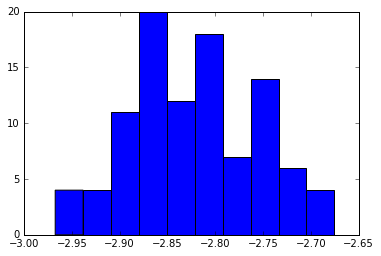

In [4]:
results = [e91.e91() for _ in range(10 ** 2)]
plt.hist(results)

In [6]:
import quantum_simulation_bb84 as bb84

In [28]:
a = bb84.BB84Agent()
b = bb84.BB84Agent()

qubits = a.send_qubits(10)
print qubits
print [a.used_bases[i].interpret(int(a.bits[i])) for i in range(10)]


b.measure(qubits)


[array([1, 0]), array([0, 1]), array([ 0.70710678,  0.70710678]), array([ 0.70710678, -0.70710678]), array([ 0.70710678,  0.70710678]), array([1, 0]), array([0, 1]), array([ 0.70710678,  0.70710678]), array([ 0.70710678, -0.70710678]), array([0, 1])]
[array([1, 0]), array([0, 1]), array([ 0.70710678,  0.70710678]), array([ 0.70710678, -0.70710678]), array([ 0.70710678,  0.70710678]), array([1, 0]), array([0, 1]), array([ 0.70710678,  0.70710678]), array([ 0.70710678, -0.70710678]), array([0, 1])]


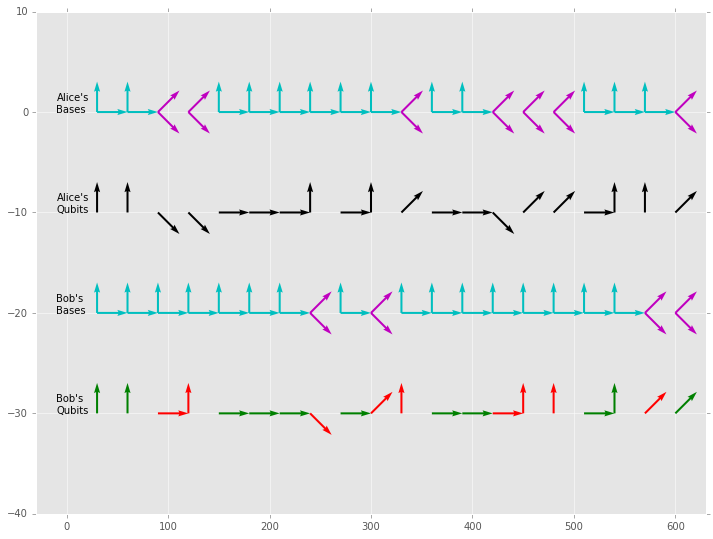

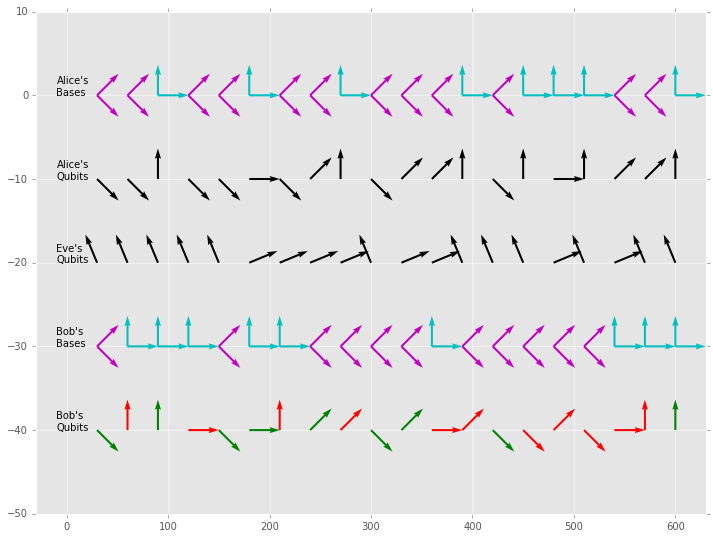

In [79]:
X_PADDING = 30
Y_PADDING = 10
X_STEP = 30
Y_STEP = 10
TEXT_X = -10
SCALE = 22.0
MINSHAFT = 3

BASIS_COLOR_MAP = {bb84.COMPUTATIONAL_NAME: 'c',
                  bb84.HADAMARD_NAME: 'm'}
QUBIT_COLOR_MAP = {True: 'g', False: 'r'}
DEFAULT_QUBIT_COLOR = 'black'

def plot_bases_arrows(used_bases, x, height):
    bases_x = x
    bases_y = [Y_STEP * height] * len(bases_x)
    
    bases_u = [(basis.basis_vectors[0][0], basis.basis_vectors[1][0]) for basis in used_bases]
    bases_u = [item for sublist in bases_u for item in sublist]
    
    bases_v = [(basis.basis_vectors[0][1], basis.basis_vectors[1][1]) for basis in used_bases]
    bases_v = [item for sublist in bases_v for item in sublist]
    
    bases_c = np.repeat([BASIS_COLOR_MAP[basis.name] for basis in used_bases], 2)

    plt.quiver(bases_x, bases_y, bases_u, bases_v, color=bases_c, scale=SCALE, minshaft=MINSHAFT)


def plot_qubit_arrows(qubits, x, height, reference_qubits=None):
    qubits_x = x
    qubits_y = [Y_STEP * height] * len(qubits_x)
    qubits_u, qubits_v = zip(*qubits)
    
    if reference_qubits:
        color = [QUBIT_COLOR_MAP[result] for result in map(np.array_equal, qubits, reference_qubits)]
        
    else:
        color = [DEFAULT_QUBIT_COLOR] * len(qubits)
    
    plt.quiver(qubits_x, qubits_y, qubits_u, qubits_v, color=color, scale=SCALE, minshaft=MINSHAFT)


def plot_qubits(n=10, eve=False):
    alice = bb84.BB84Agent()
    bob = bb84.BB84Agent()
    plt.figure(figsize=(12, 9), dpi=1000)
    
    height = 0
    
    x = [i * X_STEP for i in range(1, n + 1)]
    repeated_x = np.repeat(x, 2)
    
    alice_qubits = alice.send_qubits(n)
    
    plot_bases_arrows(alice.used_bases, repeated_x, height)
    plt.annotate(s="Alice's\nBases", xy=(TEXT_X, Y_STEP * height))
    
    height -= 1
    
    plot_qubit_arrows(alice_qubits, x, height)
    plt.annotate(s="Alice's\nQubits", xy=(TEXT_X, Y_STEP * height))
    
    if eve:
        height -= 1
        original_alice_qubits = alice_qubits
        
        eve_qubits = [bb84.EVE_BASIS.generate(bb84.EVE_BASIS.measure(qubit))
                      for qubit in alice_qubits]
        plot_qubit_arrows(eve_qubits, x, height) 
        plt.annotate(s="Eve's\nQubits", xy=(TEXT_X, Y_STEP * height))
        
        alice_qubits = eve_qubits
    
    height -= 1
    
    bob.measure(alice_qubits)

    plot_bases_arrows(bob.used_bases, repeated_x, height)
    plt.annotate(s="Bob's\nBases", xy=(TEXT_X, Y_STEP * height))
    
    height -= 1
    
    bob_qubits = [bob.used_bases[i].interpret(int(bob.bits[i])) for i in range(n)]
    plot_qubit_arrows(bob_qubits, x, height, eve and original_alice_qubits or alice_qubits) 
    plt.annotate(s="Bob's\nQubits", xy=(TEXT_X, Y_STEP * height))
    
    x_min, x_max = plt.xlim()
    plt.xlim(x_min - X_PADDING, x_max + X_PADDING)
    y_min, y_max = plt.ylim()
    plt.ylim(y_min - Y_PADDING, y_max + Y_PADDING)
    plt.show()
    
plot_qubits(20)
plot_qubits(20, True)

In [13]:
map(lambda x, y: x == y, (1, 2, 3), (1, 2, 4))

[True, True, False]